In [226]:
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import math
#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [227]:
A='30.74 28.44 30.20 32.67 33.29 31.06 30.08 30.62 27.31 27.88 ' \
  '26.03 29.93 31.63 28.13 30.62 27.80 28.69 28.14 31.62 30.61 ' \
  '27.95 31.62 29.37 30.61 31.80 29.32 29.92 31.97 30.39 29.14 ' \
  '30.14 31.54 31.03 28.52 28.00 28.46 30.38 30.64 29.51 31.04 ' \
  '27.00 30.15 29.13 27.63 30.87 28.67 27.39 33.20 29.52 30.86 ' \
  '34.01 29.41 31.18 34.59 33.35 33.73 28.39 26.82 29.53 32.55 ' \
  '30.34 32.44 27.09 29.51 31.36 31.61 31.24 28.83 31.88 32.24 ' \
  '31.72 28.34 29.89 30.27 31.42 29.11 29.36 32.24 29.56 31.72 ' \
  '30.67 28.85 30.87 27.17 30.85 28.75 25.84 28.79 31.74 34.59 ' \
  '32.69 26.23 28.20 31.62 33.48 28.00 33.86 29.22 26.50 30.89'

A = list(map(float , A.split(' ')))
A = pd.DataFrame(A)
A.rename(columns = {0: 'data'} , inplace=True)
A

,data
0,30.74
1,28.44
2,30.20
3,32.67
4,33.29
...,...
95,28.00
96,33.86
97,29.22
98,26.50


In [228]:
bins = np.arange(23.5, 37.5 + 0.5 , 0.5)
hist, bins = np.histogram(A, bins)
print('hist : {}'.format(hist))
print('bins : {}'.format(bins))
Steps=[]
for i in range(len(bins)-1):
    Steps.append((bins[i+1] - (0.5/2)))
print(Steps)


DOSU = pd.DataFrame({'계급값' : Steps  , '도수' : hist})
DOSU

hist : [ 0  0  0  0  1  2  2  5  4  9  7  8  8  8 12  7 12  3  3  4  2  1  2  0
  0  0  0  0]
bins : [23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.
 30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.
 37.5]
[23.75, 24.25, 24.75, 25.25, 25.75, 26.25, 26.75, 27.25, 27.75, 28.25, 28.75, 29.25, 29.75, 30.25, 30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75, 34.25, 34.75, 35.25, 35.75, 36.25, 36.75, 37.25]


,계급값,도수
0,23.75,0
1,24.25,0
2,24.75,0
3,25.25,0
4,25.75,1
5,26.25,2
6,26.75,2
7,27.25,5
8,27.75,4
9,28.25,9


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


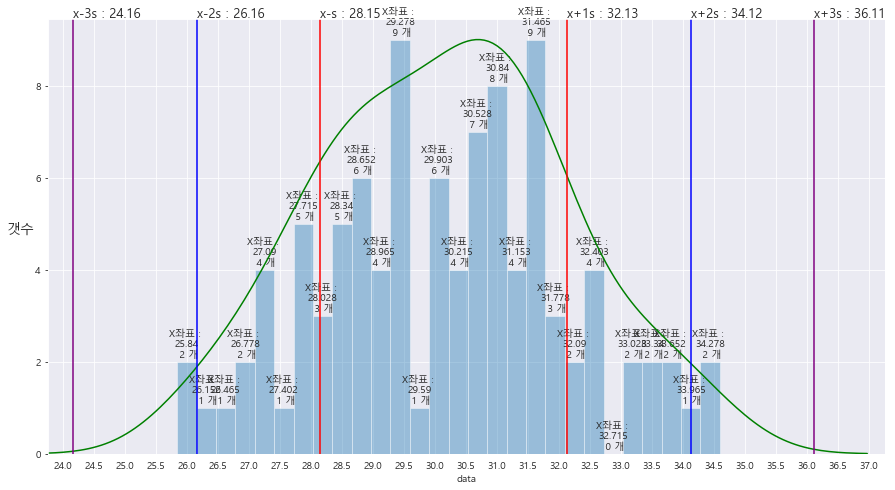

In [229]:
fig , ax1 = plt.subplots(figsize= (15,8))

ax1 = sns.distplot(A['data'],bins = 28 , kde=False)
ax1.set_xlim([Steps[0] , Steps[-1]])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
for p in ax1.patches:
    #print(p)
    ax1.text(x = p.get_x() + p.get_width()/2,
             y = p.get_height() + len(A)*0.001,
             s =  'X좌표 : \n{}\n {} {}'.format(round(p.get_x(),3),int(p.get_height()),'개'),
             #s = f'{(p.get_height()/ len(A)) * 100: 1.1f}개',
             ha = 'center')
ax1.set_ylabel('갯수' , fontsize = 14 , labelpad= 14 ,rotation = 0)
ax2 = ax1.twinx() #한 그래프에 두번째 plot 넣기
ax2 = sns.distplot(A['data'],bins = 28 , hist=False , kde=True, color='green')
ax2.set_xlim([Steps[0] , Steps[-1]])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5)) #x축 간격을 0.5로 설정
ax2.axes.yaxis.set_visible(False) #y축 없애기

x_s1 = float(A.mean() - A.std()*1)
x_s2 = float(A.mean() - A.std()*2)
x_s3 = float(A.mean() - A.std()*3)
x_plus_s1 = float(A.mean() + A.std())
x_plus_s2 = float(A.mean() + A.std()*2)
x_plus_s3 = float(A.mean() + A.std()*3)
# 막대기의 두께 in Seaborn


ax2.axvline(x= x_s1, ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_s1 , .19 , f'x-s : {round(x_s1,2)}',fontsize=13)
ax2.axvline(x= x_s2, ymin=0 , ymax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_s2 , .19 , f'x-2s : {round(x_s2,2)}',fontsize=13)
ax2.axvline(x= x_s3, ymin=0 , ymax=1 , color = 'purple' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_s3 , .19 , f'x-3s : {round(x_s3,2)}',fontsize=13)

ax2.axvline(x= x_plus_s1, ymin=0 , ymax=1 , color = 'red' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_plus_s1 , .19 , f'x+1s : {round(x_plus_s1,2)}',fontsize=13)
ax2.axvline(x= x_plus_s2, ymin=0 , ymax=1 , color = 'blue' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_plus_s2 , .19 , f'x+2s : {round(x_plus_s2,2)}',fontsize=13)
ax2.axvline(x= x_plus_s3, ymin=0 , ymax=1 , color = 'purple' , linestyle ='solid' , label ='{}'.format(2))
ax2.text(x_plus_s3 , .19 , f'x+3s : {round(x_plus_s3,2)}',fontsize=13)



plt.show()

In [230]:
print(3 + 5 + 6 + 4 + 9 + 1 + 6 + 4 + 7 + 8 + 4 + 9 + 3 )

69


In [231]:
print(69 + 1+1+2+4+1+5      + 2 + 4 +0 + 2 + 2 +2 +1)

96


In [232]:
print(100*(1- 1/(2.5)**2))

84.0


In [233]:
print(100*(1- 1/(1.5)**2))

55.55555555555556


In [234]:
print(30.138 - (1.5)*1.991)

print(30.138 + (1.5)*1.991)

27.151500000000002
33.124500000000005


## 그룹화 자료의 분산과 표준편차


In [235]:
A  ='29 30 49 21 39 38 15 39 48 41 50 38 33 40 51 29 31 42 29 69 37 20 49 40 10 49 49 49 35 45 22 45 20 45 30 41 40 38 10 31 47 19 31 21 41 46 28 29 18 28'

A = list(map(int, A.split(' ')))
A

[29,
 30,
 49,
 21,
 39,
 38,
 15,
 39,
 48,
 41,
 50,
 38,
 33,
 40,
 51,
 29,
 31,
 42,
 29,
 69,
 37,
 20,
 49,
 40,
 10,
 49,
 49,
 49,
 35,
 45,
 22,
 45,
 20,
 45,
 30,
 41,
 40,
 38,
 10,
 31,
 47,
 19,
 31,
 21,
 41,
 46,
 28,
 29,
 18,
 28]

In [236]:
A = pd.DataFrame(A)
A

,0
0,29
1,30
2,49
3,21
4,39
5,38
6,15
7,39
8,48
9,41


In [237]:
# K = 50^(1/2) +3 = 10~11
# R= 69 -10 = 59
# W - 59/10 = 5.9

#bins = np.arange(min(A), max(A)+5.9, 5.9)
bins = np.arange(9.5, 72.5 + 9 , 9)
hist, bins = np.histogram(A, bins)
print(hist)
print(bins)
Steps = []
interval = []
for i in range(len(bins)-1):
    Steps.append(int(bins[i+1] - (9/2)))
    interval.append('{} ~ {}'.format(bins[i] , bins[i+1]))
print(Steps)
print('Steps : {}'.format(Steps)) #계급값
print(interval)
print('interval : {}'.format(interval))
print(len(hist))
print('hist : {}'.format(hist))
print(len(bins))
print('bins : {}'.format(bins))
ratio = []
for i in hist:
    ratio.append(round(i/50 ,2))
print('ratio : {}'.format(ratio))



[ 4  6 13 16 10  0  1]
[ 9.5 18.5 27.5 36.5 45.5 54.5 63.5 72.5]
[14, 23, 32, 41, 50, 59, 68]
Steps : [14, 23, 32, 41, 50, 59, 68]
['9.5 ~ 18.5', '18.5 ~ 27.5', '27.5 ~ 36.5', '36.5 ~ 45.5', '45.5 ~ 54.5', '54.5 ~ 63.5', '63.5 ~ 72.5']
interval : ['9.5 ~ 18.5', '18.5 ~ 27.5', '27.5 ~ 36.5', '36.5 ~ 45.5', '45.5 ~ 54.5', '54.5 ~ 63.5', '63.5 ~ 72.5']
7
hist : [ 4  6 13 16 10  0  1]
8
bins : [ 9.5 18.5 27.5 36.5 45.5 54.5 63.5 72.5]
ratio : [0.08, 0.12, 0.26, 0.32, 0.2, 0.0, 0.02]


In [238]:
B = pd.DataFrame({'계급간격' : interval ,'도수(f_i)' : hist , '계급값(x_i)' : Steps} )
B= B.set_index('계급간격')
B

,도수(f_i),계급값(x_i)
계급간격,,
9.5 ~ 18.5,4,14
18.5 ~ 27.5,6,23
27.5 ~ 36.5,13,32
36.5 ~ 45.5,16,41
45.5 ~ 54.5,10,50
54.5 ~ 63.5,0,59
63.5 ~ 72.5,1,68


In [239]:
#print(A.mean())
B['f_i_x_i'] = B['도수(f_i)'] * B['계급값(x_i)']
print(sum(B['f_i_x_i']))
B['x_i - |x'] = B['계급값(x_i)'] - (sum(B['f_i_x_i'])/sum(B['도수(f_i)']))
B['(x_i - |x)**2'] = (B['x_i - |x']**2)
B['(x_i - |x)**2 * f_i'] = (B['(x_i - |x)**2'] *B['도수(f_i)'])
B

1834


,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
계급간격,,,,,,
9.5 ~ 18.5,4,14,56,-22.68,514.3824,2057.5296
18.5 ~ 27.5,6,23,138,-13.68,187.1424,1122.8544
27.5 ~ 36.5,13,32,416,-4.68,21.9024,284.7312
36.5 ~ 45.5,16,41,656,4.32,18.6624,298.5984
45.5 ~ 54.5,10,50,500,13.32,177.4224,1774.2240
54.5 ~ 63.5,0,59,0,22.32,498.1824,0.0000
63.5 ~ 72.5,1,68,68,31.32,980.9424,980.9424


In [240]:
a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
a[['계급값(x_i)', 'x_i - |x' , '(x_i - |x)**2', 'f_i_x_i'] ] = '-'
a

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
0,50.0,-,-,-,-,6518.88


In [241]:
a.index = ['합계']
a

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
합계,50.0,-,-,-,-,6518.88


In [242]:
B = pd.concat([B , a])
B

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
9.5 ~ 18.5,4.0,14,56,-22.68,514.3824,2057.5296
18.5 ~ 27.5,6.0,23,138,-13.68,187.1424,1122.8544
27.5 ~ 36.5,13.0,32,416,-4.68,21.9024,284.7312
36.5 ~ 45.5,16.0,41,656,4.32,18.6624,298.5984
45.5 ~ 54.5,10.0,50,500,13.32,177.4224,1774.2240
54.5 ~ 63.5,0.0,59,0,22.32,498.1824,0.0000
63.5 ~ 72.5,1.0,68,68,31.32,980.9424,980.9424
합계,50.0,-,-,-,-,6518.8800


In [243]:
#이 그룹화 자료의 분산 (s**2) =  29500 / (50-1) = 602.0408
print(29500 / 49)

602.0408163265306


In [244]:
#이 그룹화 자료의 표준편차

print(math.sqrt(602.0408))

24.536519720612375


In [245]:
C = pd.DataFrame({'계급간격' : ['1.05~1.41' , '1.41~1.77' , '1.77~2.13' , '2.13~2.49' , '2.49~2.85'] ,'도수(f_i)' : [8,6,5,7,4] , '계급값(x_i)' : [1.23,1.59,1.95,2.31,2.67]} )
C= C.set_index('계급간격')
C

,도수(f_i),계급값(x_i)
계급간격,,
1.05~1.41,8,1.23
1.41~1.77,6,1.59
1.77~2.13,5,1.95
2.13~2.49,7,2.31
2.49~2.85,4,2.67


In [246]:
print(round(float(C['도수(f_i)'].mean()),2))


6.0


In [247]:
C['f_i_x_i'] = C['도수(f_i)'] * C['계급값(x_i)']
print(sum(C['f_i_x_i']))
C['x_i - |x'] = C['계급값(x_i)'] - (sum(C['f_i_x_i'])/sum(C['도수(f_i)']))
C['(x_i - |x)**2'] = (C['x_i - |x']**2)
C['(x_i - |x)**2 * f_i'] = (C['(x_i - |x)**2'] *C['도수(f_i)'])
C

55.980000000000004


,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
계급간격,,,,,,
1.05~1.41,8,1.23,9.84,-0.636,0.404496,3.235968
1.41~1.77,6,1.59,9.54,-0.276,0.076176,0.457056
1.77~2.13,5,1.95,9.75,0.084,0.007056,0.035280
2.13~2.49,7,2.31,16.17,0.444,0.197136,1.379952
2.49~2.85,4,2.67,10.68,0.804,0.646416,2.585664


In [248]:
a =  pd.DataFrame(C[:].sum(axis=0))
# a.transpose()
a = a.transpose()
a[['계급값(x_i)', 'x_i - |x' , '(x_i - |x)**2', 'f_i_x_i'] ] = '-'
a

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
0,30.0,-,-,-,-,7.69392


In [249]:
a.index = ['합계']
a

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
합계,30.0,-,-,-,-,7.69392


In [250]:
C = pd.concat([C , a])
C

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
1.05~1.41,8.0,1.23,9.84,-0.636,0.404496,3.235968
1.41~1.77,6.0,1.59,9.54,-0.276,0.076176,0.457056
1.77~2.13,5.0,1.95,9.75,0.084,0.007056,0.035280
2.13~2.49,7.0,2.31,16.17,0.444,0.197136,1.379952
2.49~2.85,4.0,2.67,10.68,0.804,0.646416,2.585664
합계,30.0,-,-,-,-,7.693920


In [251]:
print(60/29)

2.0689655172413794


In [252]:
print(math.sqrt(60/29))

1.4383899044561526


In [253]:
C = pd.DataFrame({'계급간격' : ['0.5~4.5' , '4.5~8.5' , '8.5~12.5' , '12.5~16.5' , '16.5~20.5' , '20.5~24.5', '24.5~28.5', '28.5~32.5'] ,'도수(f_i)' : [25,55,60,90,115,85,50,20] , '계급값(x_i)' : [2.5,6.5,10.5,14.5,18.5,22.5,26.5,30.5]} )
C= C.set_index('계급간격')
C

,도수(f_i),계급값(x_i)
계급간격,,
0.5~4.5,25,2.5
4.5~8.5,55,6.5
8.5~12.5,60,10.5
12.5~16.5,90,14.5
16.5~20.5,115,18.5
20.5~24.5,85,22.5
24.5~28.5,50,26.5
28.5~32.5,20,30.5


In [254]:
C['f_i_x_i'] = C['도수(f_i)'] * C['계급값(x_i)']
print(sum(C['f_i_x_i']))
C['x_i - |x'] = C['계급값(x_i)'] - (sum(C['f_i_x_i'])/sum(C['도수(f_i)']))
C['(x_i - |x)**2'] = (C['x_i - |x']**2)
C['(x_i - |x)**2 * f_i'] = (C['(x_i - |x)**2'] *C['도수(f_i)'])
C

8330.0


,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
계급간격,,,,,,
0.5~4.5,25,2.5,62.5,-14.16,200.5056,5012.640
4.5~8.5,55,6.5,357.5,-10.16,103.2256,5677.408
8.5~12.5,60,10.5,630.0,-6.16,37.9456,2276.736
12.5~16.5,90,14.5,1305.0,-2.16,4.6656,419.904
16.5~20.5,115,18.5,2127.5,1.84,3.3856,389.344
20.5~24.5,85,22.5,1912.5,5.84,34.1056,2898.976
24.5~28.5,50,26.5,1325.0,9.84,96.8256,4841.280
28.5~32.5,20,30.5,610.0,13.84,191.5456,3830.912


In [258]:
a =  pd.DataFrame(C[:].sum(axis=0))
# a.transpose()
a = a.transpose()
a[['계급값(x_i)', 'x_i - |x' , '(x_i - |x)**2', 'f_i_x_i'] ] = '-'
a

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
0,500.0,-,-,-,-,25347.2


In [259]:
a.index = ['합계']
a

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
합계,500.0,-,-,-,-,25347.2


In [260]:
C = pd.concat([C , a])
C

,도수(f_i),계급값(x_i),f_i_x_i,x_i - |x,(x_i - |x)**2,(x_i - |x)**2 * f_i
0.5~4.5,25.0,2.5,62.5,-14.16,200.5056,5012.640
4.5~8.5,55.0,6.5,357.5,-10.16,103.2256,5677.408
8.5~12.5,60.0,10.5,630.0,-6.16,37.9456,2276.736
12.5~16.5,90.0,14.5,1305.0,-2.16,4.6656,419.904
16.5~20.5,115.0,18.5,2127.5,1.84,3.3856,389.344
20.5~24.5,85.0,22.5,1912.5,5.84,34.1056,2898.976
24.5~28.5,50.0,26.5,1325.0,9.84,96.8256,4841.280
28.5~32.5,20.0,30.5,610.0,13.84,191.5456,3830.912
합계,500.0,-,-,-,-,25347.200


In [263]:
print(C.iloc[-1,-1])
print(C.iloc[0,-1])
var = (C.iloc[-1,-1] / C.iloc[-1,0])
std = math.sqrt(var)

print("분산 : {} 표본표준편차 : {}".format( var ,  std))

25347.199999999997
5012.64
분산 : 50.694399999999995 표본표준편차 : 7.119999999999999


In [256]:
print((14.5+24.5+34.5+44.5+54.5+64.5)/6)

39.5


In [257]:
print((9+9+9+10+2+1) / 6)

6.666666666666667
